In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path('./datasets/flower_photos/flower_photos')
data_dir
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

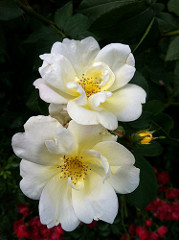

In [7]:
PIL.Image.open(str(roses[0]))

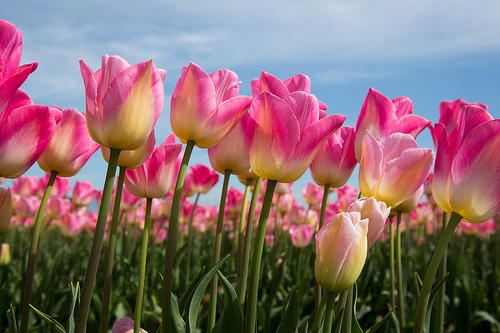

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

## Read flower images from disk into numpy array using opencv

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))

}

In [10]:
flowers_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [11]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(flowers_images_dict['roses'][0])

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
x,y = [],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [17]:
x = np.array(x)
y = np.array(y)

## Train test split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=0)

## Preprocessing: scale images

In [19]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

## Build convolutional neural network and train it

In [22]:
num_classes = 5
model =Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 59s 589ms/step - accuracy: 0.3419 - loss: 31.4333
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 539ms/step - accuracy: 0.5472 - loss: 1.1296
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 66s 764ms/step - accuracy: 0.7347 - loss: 0.7352
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 867ms/step - accuracy: 0.8565 - loss: 0.4218
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 59s 586ms/step - accuracy: 0.9208 - loss: 0.2502
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 598ms/step - accuracy: 0.9506 - loss: 0.1704
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 98s 782ms/step - accuracy: 0.9695 - loss: 0.1230
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 57s 655ms/step - accuracy: 0.9800 - loss: 0.0738
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 944ms/step - accuracy: 0.9862 - loss: 0.0636
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 61s 682ms/step - accuracy: 0.9742 - loss: 0.0946
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9702 - loss: 0.1130
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12

In [25]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.2462 - loss: 1.9841


[1.9841408729553223, 0.24618735909461975]

In [26]:
y_predictions = model.predict(x_test_scaled)
y_predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step


array([[-1.0705209 , -0.41938853,  2.6172233 , -0.556497  , -0.74399114],
       [ 0.09362413,  0.06360658,  0.8206364 , -0.38341725, -0.0131797 ],
       [-0.78648096, -0.768381  ,  2.8591702 , -0.57563305, -0.862197  ],
       ...,
       [-0.6787963 , -0.43372998,  1.793991  , -0.49064654, -0.47258106],
       [-0.61060715, -0.494919  ,  1.8914047 , -0.45018494, -0.37042847],
       [-0.70327204, -0.6409833 ,  1.8973005 , -0.31261835, -0.8109012 ]],
      shape=(918, 5), dtype=float32)

In [27]:
score = tf.nn.softmax(y_predictions[0])
np.argmax(score)

np.int64(2)

In [28]:
y_test[0]

np.int64(1)

## Improve Test Accuracy Using Data Augmentation

In [32]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])



c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Original Image

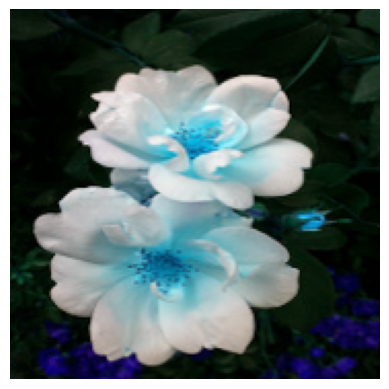

In [33]:
plt.axis('off')
plt.imshow(x[0])

### Newly generated training sample using data agumentation

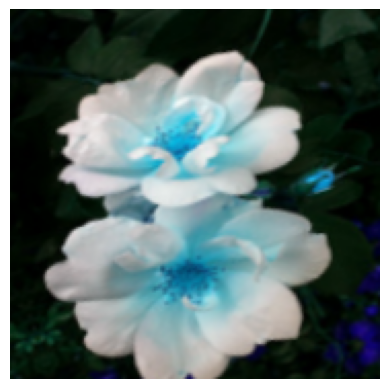

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))